# Bande di Bollinger

Vedere le bande in OANDA o IBKR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\Paolo\AppData\Local\Temp\ipykernel_26728\1123596123.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
# WITH OANDA
import tpqoa
api = tpqoa.tpqoa("oandaMY.cfg")

In [3]:
# WITH IBKR
# ib.disconnect()
import pandas as pd
from ib_insync import *
util.startLoop()  # not necessary in scripts
ib = IB()
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [4]:
# WITH OANDA
df = api.get_history(instrument = "EUR_USD", start = "2021-09-24", end = "2024-09-24", granularity = "H8", price = "M")
# we change the column names to match IBKR
df.rename(columns={"o":"open","h":"high","l":"low","c":"close","time":"date"},inplace=True)
df.index.names = ['date']
df = df.close.to_frame()
df.head(5)

close
date                        
2021-09-23 21:00:00  1.17372
2021-09-24 05:00:00  1.17066
2021-09-24 13:00:00  1.17206
2021-09-26 21:00:00  1.17224
2021-09-27 05:00:00  1.17073

In [5]:
# WITH IBKR
df = pd.DataFrame(ib.reqHistoricalData( Forex("EURUSD"), endDateTime = "20240924 00:00:00", 
                                  barSizeSetting="8 hours", durationStr="4 Y", 
                                  whatToShow= "MIDPOINT", useRTH = True, formatDate=2 )).set_index("date")
df.index=pd.to_datetime(df.index)
df = df.close.to_frame()
df.head(5)

close
date                              
2020-09-27 21:15:00+00:00  1.16340
2020-09-28 00:00:00+00:00  1.16295
2020-09-28 08:00:00+00:00  1.16600
2020-09-28 16:00:00+00:00  1.16640
2020-09-28 21:15:00+00:00  1.16770

In [6]:
window = 30
dev = 2

In [7]:
df["SMA"]=df.close.rolling(window).mean()
df["devst"]=df.close.rolling(window).std()
df["lower"]=df.SMA-dev * df.devst
df["upper"]=df.SMA+dev*df.devst

In [8]:
df.head(50)

close       SMA     devst     lower     upper
date                                                                      
2020-09-27 21:15:00+00:00  1.16340       NaN       NaN       NaN       NaN
2020-09-28 00:00:00+00:00  1.16295       NaN       NaN       NaN       NaN
2020-09-28 08:00:00+00:00  1.16600       NaN       NaN       NaN       NaN
2020-09-28 16:00:00+00:00  1.16640       NaN       NaN       NaN       NaN
2020-09-28 21:15:00+00:00  1.16770       NaN       NaN       NaN       NaN
2020-09-29 00:00:00+00:00  1.16810       NaN       NaN       NaN       NaN
2020-09-29 08:00:00+00:00  1.17165       NaN       NaN       NaN       NaN
2020-09-29 16:00:00+00:00  1.17430       NaN       NaN       NaN       NaN
2020-09-29 21:15:00+00:00  1.17415       NaN       NaN       NaN       NaN
2020-09-30 00:00:00+00:00  1.17330       NaN       NaN       NaN       NaN
2020-09-30 08:00:00+00:00  1.17220       NaN       NaN       NaN       NaN
2020-09-30 16:00:00+00:00  1.17205       NaN       NaN       NaN       NaN
2020-09-30 21:15:00+00:00  1.17235       NaN       NaN       NaN       NaN
2020-10-01 00:00:00+00:00  1.17365       NaN       NaN       NaN       NaN
2020-10-01 08:00:00+00:00  1.17515       NaN       NaN       NaN       NaN
2020-10-01 16:00:00+00:00  1.17440       NaN       NaN       NaN       NaN
2020-10-01 21:15:00+00:00  1.17440       NaN       NaN       NaN       NaN
2020-10-02 00:00:00+00:00  1.17230       NaN       NaN       NaN       NaN
2020-10-02 08:00:00+00:00  1.17060       NaN       NaN       NaN       NaN
2020-10-02 16:00:00+00:00  1.17160       NaN       NaN       NaN       NaN
2020-10-04 21:15:00+00:00  1.17195       NaN       NaN       NaN       NaN
2020-10-05 00:00:00+00:00  1.17325       NaN       NaN       NaN       NaN
2020-10-05 08:00:00+00:00  1.17845       NaN       NaN       NaN       NaN
2020-10-05 16:00:00+00:00  1.17830       NaN       NaN       NaN       NaN
2020-10-05 21:15:00+00:00  1.17890       NaN       NaN       NaN       NaN
2020-10-06 00:00:00+00:00  1.17765       NaN       NaN       NaN       NaN
2020-10-06 08:00:00+00:00  1.17780       NaN       NaN       NaN       NaN
2020-10-06 16:00:00+00:00  1.17340       NaN       NaN       NaN       NaN
2020-10-06 21:15:00+00:00  1.17370       NaN       NaN       NaN       NaN
2020-10-07 00:00:00+00:00  1.17665  1.172557  0.004187  1.164183  1.180931
2020-10-07 08:00:00+00:00  1.17665  1.172998  0.003875  1.165248  1.180748
2020-10-07 16:00:00+00:00  1.17605  1.173435  0.003414  1.166606  1.180264
2020-10-07 21:15:00+00:00  1.17655  1.173787  0.003156  1.167475  1.180098
2020-10-08 00:00:00+00:00  1.17665  1.174128  0.002870  1.168388  1.179869
2020-10-08 08:00:00+00:00  1.17520  1.174378  0.002606  1.169167  1.179589
2020-10-08 16:00:00+00:00  1.17600  1.174642  0.002334  1.169973  1.179310
2020-10-08 21:15:00+00:00  1.17670  1.174810  0.002293  1.170225  1.179395
2020-10-09 00:00:00+00:00  1.17770  1.174923  0.002350  1.170223  1.179623
2020-10-09 08:00:00+00:00  1.18185  1.175180  0.002662  1.169855  1.180505
2020-10-09 16:00:00+00:00  1.18280  1.175497  0.002977  1.169542  1.181451
2020-10-11 21:15:00+00:00  1.18155  1.175808  0.003107  1.169594  1.182022
2020-10-12 00:00:00+00:00  1.18200  1.176140  0.003221  1.169698  1.182582
2020-10-12 08:00:00+00:00  1.18040  1.176408  0.003230  1.169949  1.182867
2020-10-12 16:00:00+00:00  1.18115  1.176658  0.003298  1.170062  1.183255
2020-10-12 21:15:00+00:00  1.18130  1.176863  0.003391  1.170081  1.183645
2020-10-13 00:00:00+00:00  1.17805  1.176985  0.003365  1.170255  1.183715
2020-10-13 08:00:00+00:00  1.17385  1.176967  0.003381  1.170205  1.183729
2020-10-13 16:00:00+00:00  1.17455  1.177042  0.003298  1.170446  1.183637
2020-10-13 21:15:00+00:00  1.17420  1.177162  0.003116  1.170930  1.183393
2020-10-14 00:00:00+00:00  1.17415  1.177247  0.002991  1.171264  1.183229

<Axes: xlabel='date'>

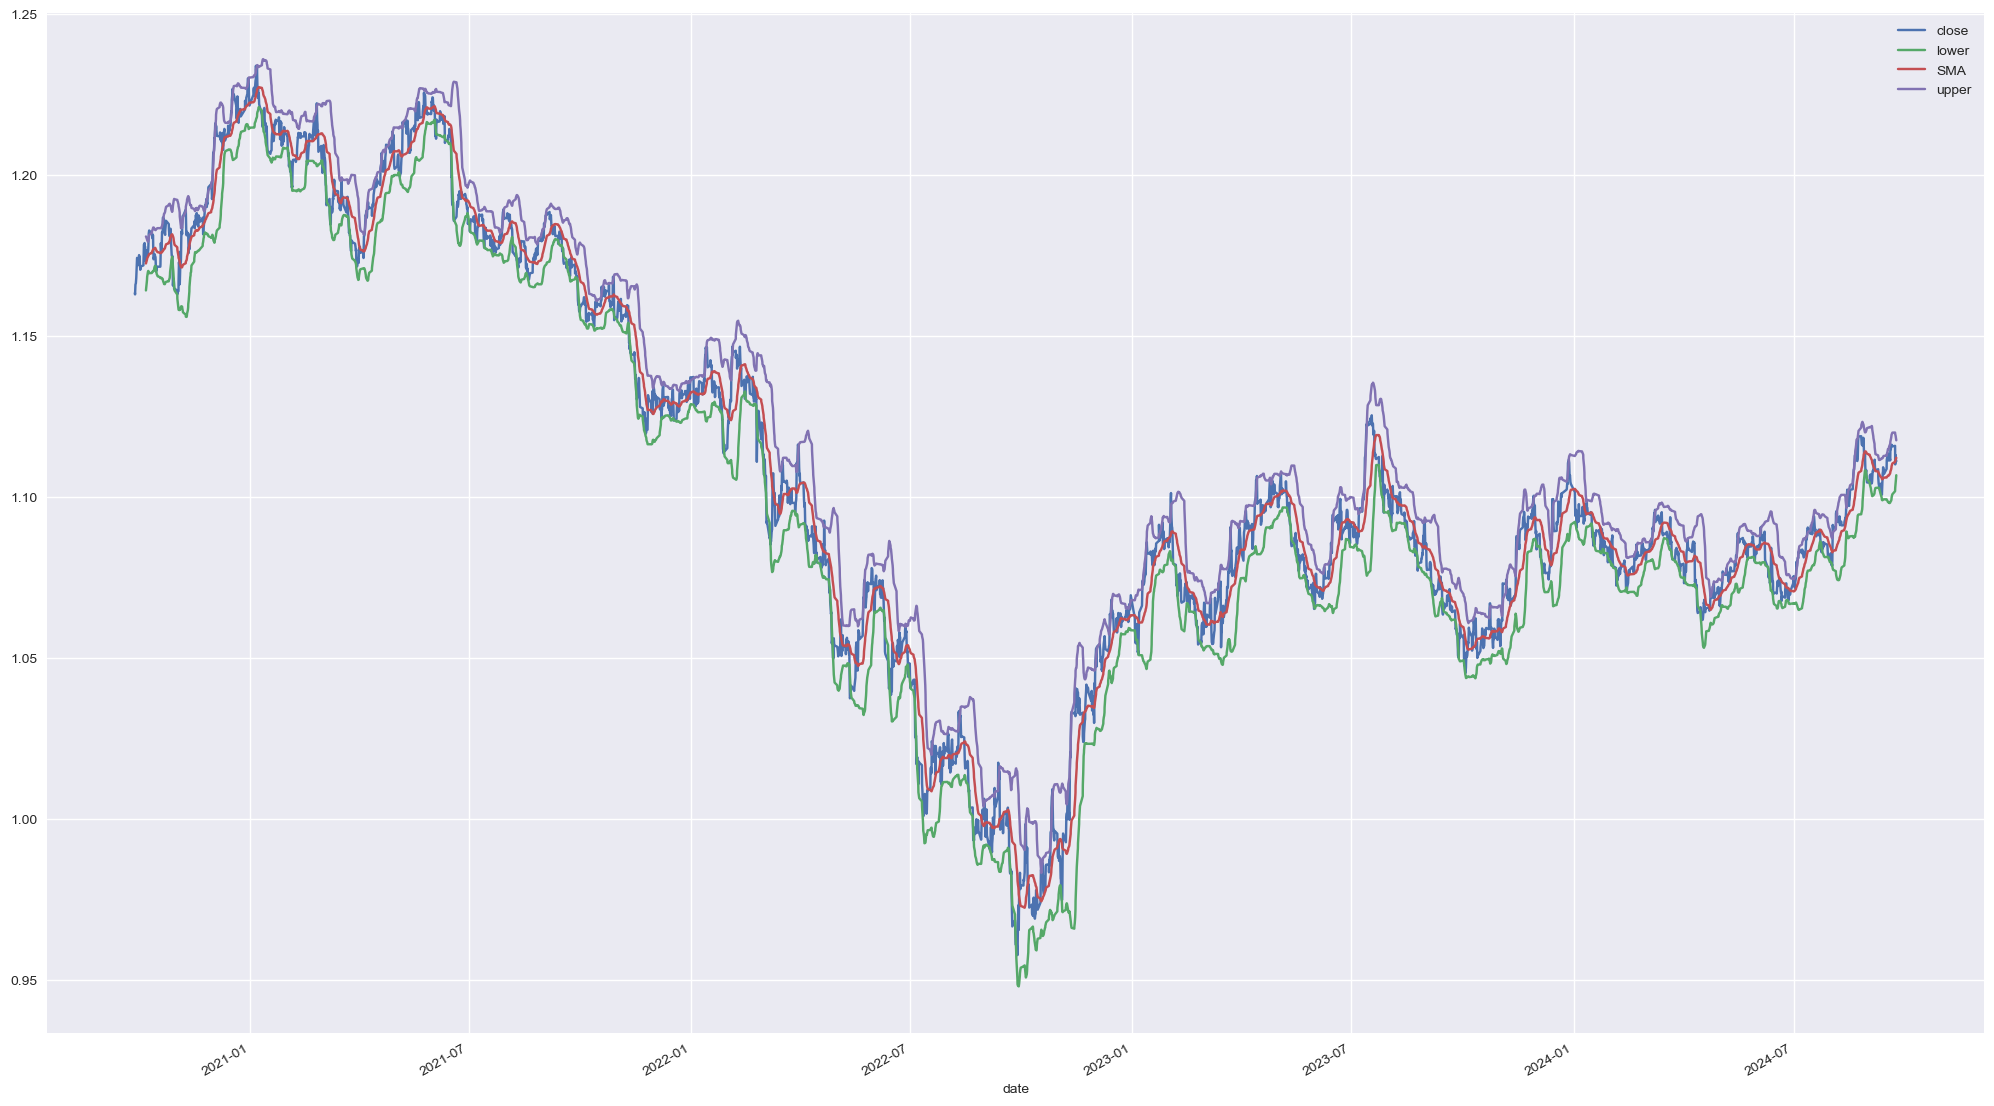

In [9]:
df[["close","lower","SMA","upper"]].plot(figsize=(25,15))

<Axes: xlabel='date'>

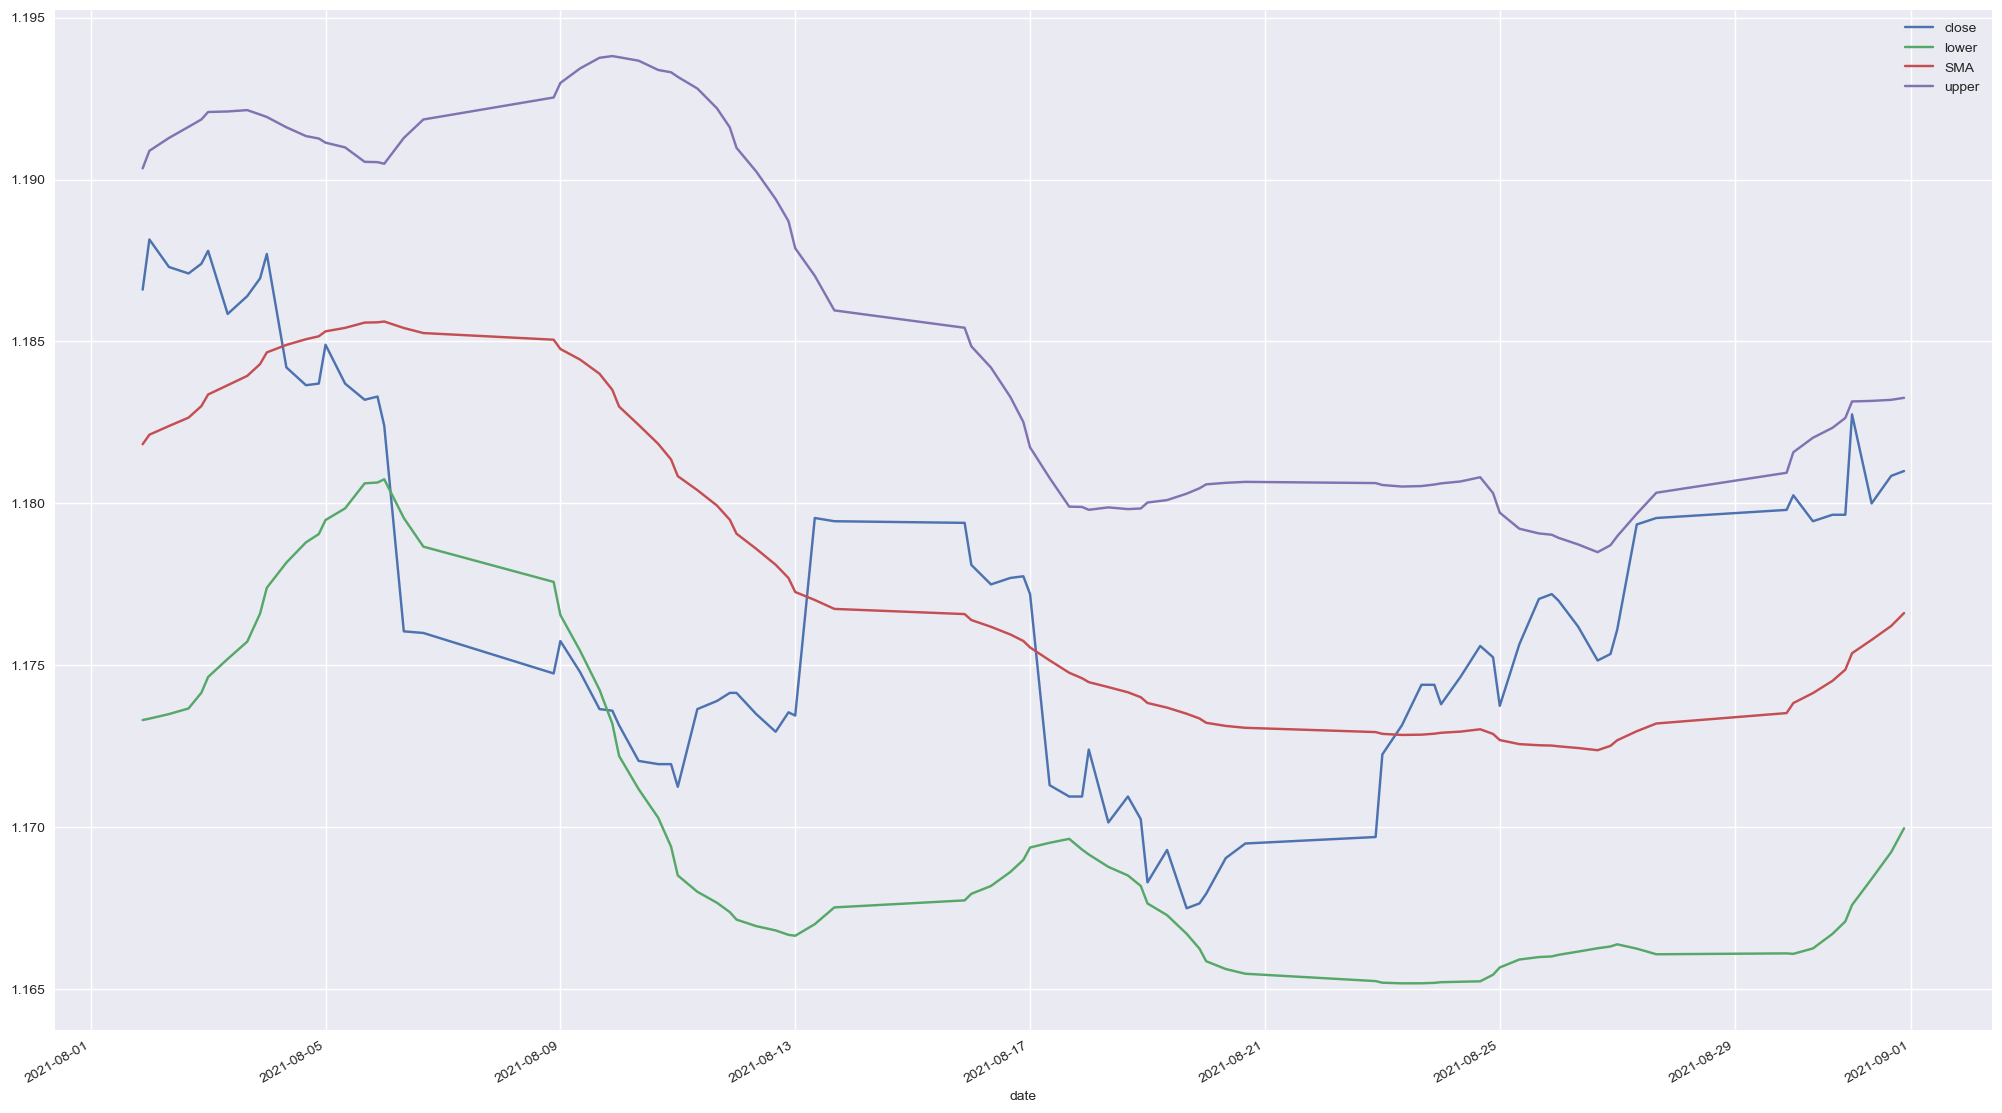

In [12]:
df[["close","lower","SMA","upper"]].loc["2021-08"].plot(figsize=(25,15))

In [13]:
df["posizione"]=np.where(df.close<df.lower,+1,np.nan)
df["posizione"]=np.where(df.close>df.upper,-1,df["posizione"])

In [14]:
df.loc["2021-08"].head(30)

close       SMA     devst     lower     upper  \
date                                                                         
2021-08-01 21:15:00+00:00  1.18660  1.181828  0.004258  1.173311  1.190345   
2021-08-02 00:00:00+00:00  1.18815  1.182122  0.004383  1.173355  1.190888   
2021-08-02 08:00:00+00:00  1.18730  1.182390  0.004447  1.173496  1.191284   
2021-08-02 16:00:00+00:00  1.18710  1.182648  0.004489  1.173670  1.191627   
2021-08-02 21:15:00+00:00  1.18740  1.183005  0.004425  1.174155  1.191855   
2021-08-03 00:00:00+00:00  1.18780  1.183363  0.004361  1.174641  1.192085   
2021-08-03 08:00:00+00:00  1.18585  1.183650  0.004226  1.175198  1.192102   
2021-08-03 16:00:00+00:00  1.18640  1.183938  0.004103  1.175733  1.192144   
2021-08-03 21:15:00+00:00  1.18695  1.184303  0.003852  1.176600  1.192006   
2021-08-04 00:00:00+00:00  1.18770  1.184663  0.003634  1.177395  1.191932   
2021-08-04 08:00:00+00:00  1.18420  1.184893  0.003360  1.178173  1.191614   
2021-08-04 16:00:00+00:00  1.18365  1.185070  0.003136  1.178798  1.191342   
2021-08-04 21:15:00+00:00  1.18370  1.185160  0.003053  1.179054  1.191266   
2021-08-05 00:00:00+00:00  1.18490  1.185313  0.002913  1.179488  1.191139   
2021-08-05 08:00:00+00:00  1.18370  1.185420  0.002786  1.179847  1.190993   
2021-08-05 16:00:00+00:00  1.18320  1.185583  0.002482  1.180620  1.190546   
2021-08-05 21:15:00+00:00  1.18330  1.185592  0.002473  1.180645  1.190538   
2021-08-06 00:00:00+00:00  1.18240  1.185617  0.002435  1.180746  1.190488   
2021-08-06 08:00:00+00:00  1.17605  1.185417  0.002934  1.179549  1.191284   
2021-08-06 16:00:00+00:00  1.17600  1.185260  0.003297  1.178665  1.191855   
2021-08-08 21:15:00+00:00  1.17475  1.185055  0.003739  1.177576  1.192534   
2021-08-09 00:00:00+00:00  1.17575  1.184768  0.004107  1.176555  1.192982   
2021-08-09 08:00:00+00:00  1.17480  1.184443  0.004492  1.175459  1.193428   
2021-08-09 16:00:00+00:00  1.17365  1.184003  0.004878  1.174247  1.193760   
2021-08-09 21:15:00+00:00  1.17360  1.183505  0.005154  1.173198  1.193812   
2021-08-10 00:00:00+00:00  1.17315  1.182990  0.005393  1.172203  1.193777   
2021-08-10 08:00:00+00:00  1.17205  1.182423  0.005623  1.171177  1.193669   
2021-08-10 16:00:00+00:00  1.17195  1.181838  0.005772  1.170294  1.193383   
2021-08-10 21:15:00+00:00  1.17195  1.181357  0.005978  1.169401  1.193312   
2021-08-11 00:00:00+00:00  1.17125  1.180842  0.006164  1.168513  1.193170   

                           posizione  
date                                  
2021-08-01 21:15:00+00:00        NaN  
2021-08-02 00:00:00+00:00        NaN  
2021-08-02 08:00:00+00:00        NaN  
2021-08-02 16:00:00+00:00        NaN  
2021-08-02 21:15:00+00:00        NaN  
2021-08-03 00:00:00+00:00        NaN  
2021-08-03 08:00:00+00:00        NaN  
2021-08-03 16:00:00+00:00        NaN  
2021-08-03 21:15:00+00:00        NaN  
2021-08-04 00:00:00+00:00        NaN  
2021-08-04 08:00:00+00:00        NaN  
2021-08-04 16:00:00+00:00        NaN  
2021-08-04 21:15:00+00:00        NaN  
2021-08-05 00:00:00+00:00        NaN  
2021-08-05 08:00:00+00:00        NaN  
2021-08-05 16:00:00+00:00        NaN  
2021-08-05 21:15:00+00:00        NaN  
2021-08-06 00:00:00+00:00        NaN  
2021-08-06 08:00:00+00:00        1.0  
2021-08-06 16:00:00+00:00        1.0  
2021-08-08 21:15:00+00:00        1.0  
2021-08-09 00:00:00+00:00        1.0  
2021-08-09 08:00:00+00:00        1.0  
2021-08-09 16:00:00+00:00        1.0  
2021-08-09 21:15:00+00:00        NaN  
2021-08-10 00:00:00+00:00        NaN  
2021-08-10 08:00:00+00:00        NaN  
2021-08-10 16:00:00+00:00        NaN  
2021-08-10 21:15:00+00:00        NaN  
2021-08-11 00:00:00+00:00        NaN

In [15]:
df["posizione"]=np.where( np.sign(df.close-df.SMA)!=np.sign((df.close-df.SMA).shift(1)) , 0, df["posizione"] )

In [16]:
df.loc["2021-08"].head(30)

close       SMA     devst     lower     upper  \
date                                                                         
2021-08-01 21:15:00+00:00  1.18660  1.181828  0.004258  1.173311  1.190345   
2021-08-02 00:00:00+00:00  1.18815  1.182122  0.004383  1.173355  1.190888   
2021-08-02 08:00:00+00:00  1.18730  1.182390  0.004447  1.173496  1.191284   
2021-08-02 16:00:00+00:00  1.18710  1.182648  0.004489  1.173670  1.191627   
2021-08-02 21:15:00+00:00  1.18740  1.183005  0.004425  1.174155  1.191855   
2021-08-03 00:00:00+00:00  1.18780  1.183363  0.004361  1.174641  1.192085   
2021-08-03 08:00:00+00:00  1.18585  1.183650  0.004226  1.175198  1.192102   
2021-08-03 16:00:00+00:00  1.18640  1.183938  0.004103  1.175733  1.192144   
2021-08-03 21:15:00+00:00  1.18695  1.184303  0.003852  1.176600  1.192006   
2021-08-04 00:00:00+00:00  1.18770  1.184663  0.003634  1.177395  1.191932   
2021-08-04 08:00:00+00:00  1.18420  1.184893  0.003360  1.178173  1.191614   
2021-08-04 16:00:00+00:00  1.18365  1.185070  0.003136  1.178798  1.191342   
2021-08-04 21:15:00+00:00  1.18370  1.185160  0.003053  1.179054  1.191266   
2021-08-05 00:00:00+00:00  1.18490  1.185313  0.002913  1.179488  1.191139   
2021-08-05 08:00:00+00:00  1.18370  1.185420  0.002786  1.179847  1.190993   
2021-08-05 16:00:00+00:00  1.18320  1.185583  0.002482  1.180620  1.190546   
2021-08-05 21:15:00+00:00  1.18330  1.185592  0.002473  1.180645  1.190538   
2021-08-06 00:00:00+00:00  1.18240  1.185617  0.002435  1.180746  1.190488   
2021-08-06 08:00:00+00:00  1.17605  1.185417  0.002934  1.179549  1.191284   
2021-08-06 16:00:00+00:00  1.17600  1.185260  0.003297  1.178665  1.191855   
2021-08-08 21:15:00+00:00  1.17475  1.185055  0.003739  1.177576  1.192534   
2021-08-09 00:00:00+00:00  1.17575  1.184768  0.004107  1.176555  1.192982   
2021-08-09 08:00:00+00:00  1.17480  1.184443  0.004492  1.175459  1.193428   
2021-08-09 16:00:00+00:00  1.17365  1.184003  0.004878  1.174247  1.193760   
2021-08-09 21:15:00+00:00  1.17360  1.183505  0.005154  1.173198  1.193812   
2021-08-10 00:00:00+00:00  1.17315  1.182990  0.005393  1.172203  1.193777   
2021-08-10 08:00:00+00:00  1.17205  1.182423  0.005623  1.171177  1.193669   
2021-08-10 16:00:00+00:00  1.17195  1.181838  0.005772  1.170294  1.193383   
2021-08-10 21:15:00+00:00  1.17195  1.181357  0.005978  1.169401  1.193312   
2021-08-11 00:00:00+00:00  1.17125  1.180842  0.006164  1.168513  1.193170   

                           posizione  
date                                  
2021-08-01 21:15:00+00:00        NaN  
2021-08-02 00:00:00+00:00        NaN  
2021-08-02 08:00:00+00:00        NaN  
2021-08-02 16:00:00+00:00        NaN  
2021-08-02 21:15:00+00:00        NaN  
2021-08-03 00:00:00+00:00        NaN  
2021-08-03 08:00:00+00:00        NaN  
2021-08-03 16:00:00+00:00        NaN  
2021-08-03 21:15:00+00:00        NaN  
2021-08-04 00:00:00+00:00        NaN  
2021-08-04 08:00:00+00:00        0.0  
2021-08-04 16:00:00+00:00        NaN  
2021-08-04 21:15:00+00:00        NaN  
2021-08-05 00:00:00+00:00        NaN  
2021-08-05 08:00:00+00:00        NaN  
2021-08-05 16:00:00+00:00        NaN  
2021-08-05 21:15:00+00:00        NaN  
2021-08-06 00:00:00+00:00        NaN  
2021-08-06 08:00:00+00:00        1.0  
2021-08-06 16:00:00+00:00        1.0  
2021-08-08 21:15:00+00:00        1.0  
2021-08-09 00:00:00+00:00        1.0  
2021-08-09 08:00:00+00:00        1.0  
2021-08-09 16:00:00+00:00        1.0  
2021-08-09 21:15:00+00:00        NaN  
2021-08-10 00:00:00+00:00        NaN  
2021-08-10 08:00:00+00:00        NaN  
2021-08-10 16:00:00+00:00        NaN  
2021-08-10 21:15:00+00:00        NaN  
2021-08-11 00:00:00+00:00        NaN

In [17]:
df["posizione"]=df.posizione.ffill()

In [18]:
df.loc["2021-08"].head(30)

close       SMA     devst     lower     upper  \
date                                                                         
2021-08-01 21:15:00+00:00  1.18660  1.181828  0.004258  1.173311  1.190345   
2021-08-02 00:00:00+00:00  1.18815  1.182122  0.004383  1.173355  1.190888   
2021-08-02 08:00:00+00:00  1.18730  1.182390  0.004447  1.173496  1.191284   
2021-08-02 16:00:00+00:00  1.18710  1.182648  0.004489  1.173670  1.191627   
2021-08-02 21:15:00+00:00  1.18740  1.183005  0.004425  1.174155  1.191855   
2021-08-03 00:00:00+00:00  1.18780  1.183363  0.004361  1.174641  1.192085   
2021-08-03 08:00:00+00:00  1.18585  1.183650  0.004226  1.175198  1.192102   
2021-08-03 16:00:00+00:00  1.18640  1.183938  0.004103  1.175733  1.192144   
2021-08-03 21:15:00+00:00  1.18695  1.184303  0.003852  1.176600  1.192006   
2021-08-04 00:00:00+00:00  1.18770  1.184663  0.003634  1.177395  1.191932   
2021-08-04 08:00:00+00:00  1.18420  1.184893  0.003360  1.178173  1.191614   
2021-08-04 16:00:00+00:00  1.18365  1.185070  0.003136  1.178798  1.191342   
2021-08-04 21:15:00+00:00  1.18370  1.185160  0.003053  1.179054  1.191266   
2021-08-05 00:00:00+00:00  1.18490  1.185313  0.002913  1.179488  1.191139   
2021-08-05 08:00:00+00:00  1.18370  1.185420  0.002786  1.179847  1.190993   
2021-08-05 16:00:00+00:00  1.18320  1.185583  0.002482  1.180620  1.190546   
2021-08-05 21:15:00+00:00  1.18330  1.185592  0.002473  1.180645  1.190538   
2021-08-06 00:00:00+00:00  1.18240  1.185617  0.002435  1.180746  1.190488   
2021-08-06 08:00:00+00:00  1.17605  1.185417  0.002934  1.179549  1.191284   
2021-08-06 16:00:00+00:00  1.17600  1.185260  0.003297  1.178665  1.191855   
2021-08-08 21:15:00+00:00  1.17475  1.185055  0.003739  1.177576  1.192534   
2021-08-09 00:00:00+00:00  1.17575  1.184768  0.004107  1.176555  1.192982   
2021-08-09 08:00:00+00:00  1.17480  1.184443  0.004492  1.175459  1.193428   
2021-08-09 16:00:00+00:00  1.17365  1.184003  0.004878  1.174247  1.193760   
2021-08-09 21:15:00+00:00  1.17360  1.183505  0.005154  1.173198  1.193812   
2021-08-10 00:00:00+00:00  1.17315  1.182990  0.005393  1.172203  1.193777   
2021-08-10 08:00:00+00:00  1.17205  1.182423  0.005623  1.171177  1.193669   
2021-08-10 16:00:00+00:00  1.17195  1.181838  0.005772  1.170294  1.193383   
2021-08-10 21:15:00+00:00  1.17195  1.181357  0.005978  1.169401  1.193312   
2021-08-11 00:00:00+00:00  1.17125  1.180842  0.006164  1.168513  1.193170   

                           posizione  
date                                  
2021-08-01 21:15:00+00:00       -1.0  
2021-08-02 00:00:00+00:00       -1.0  
2021-08-02 08:00:00+00:00       -1.0  
2021-08-02 16:00:00+00:00       -1.0  
2021-08-02 21:15:00+00:00       -1.0  
2021-08-03 00:00:00+00:00       -1.0  
2021-08-03 08:00:00+00:00       -1.0  
2021-08-03 16:00:00+00:00       -1.0  
2021-08-03 21:15:00+00:00       -1.0  
2021-08-04 00:00:00+00:00       -1.0  
2021-08-04 08:00:00+00:00        0.0  
2021-08-04 16:00:00+00:00        0.0  
2021-08-04 21:15:00+00:00        0.0  
2021-08-05 00:00:00+00:00        0.0  
2021-08-05 08:00:00+00:00        0.0  
2021-08-05 16:00:00+00:00        0.0  
2021-08-05 21:15:00+00:00        0.0  
2021-08-06 00:00:00+00:00        0.0  
2021-08-06 08:00:00+00:00        1.0  
2021-08-06 16:00:00+00:00        1.0  
2021-08-08 21:15:00+00:00        1.0  
2021-08-09 00:00:00+00:00        1.0  
2021-08-09 08:00:00+00:00        1.0  
2021-08-09 16:00:00+00:00        1.0  
2021-08-09 21:15:00+00:00        1.0  
2021-08-10 00:00:00+00:00        1.0  
2021-08-10 08:00:00+00:00        1.0  
2021-08-10 16:00:00+00:00        1.0  
2021-08-10 21:15:00+00:00        1.0  
2021-08-11 00:00:00+00:00        1.0

In [19]:
df["posizione"]=df.posizione.fillna(0)

In [20]:
df.posizione.value_counts()

 0.0    1878
-1.0    1158
 1.0    1104
Name: posizione, dtype: int64

<Axes: xlabel='date'>

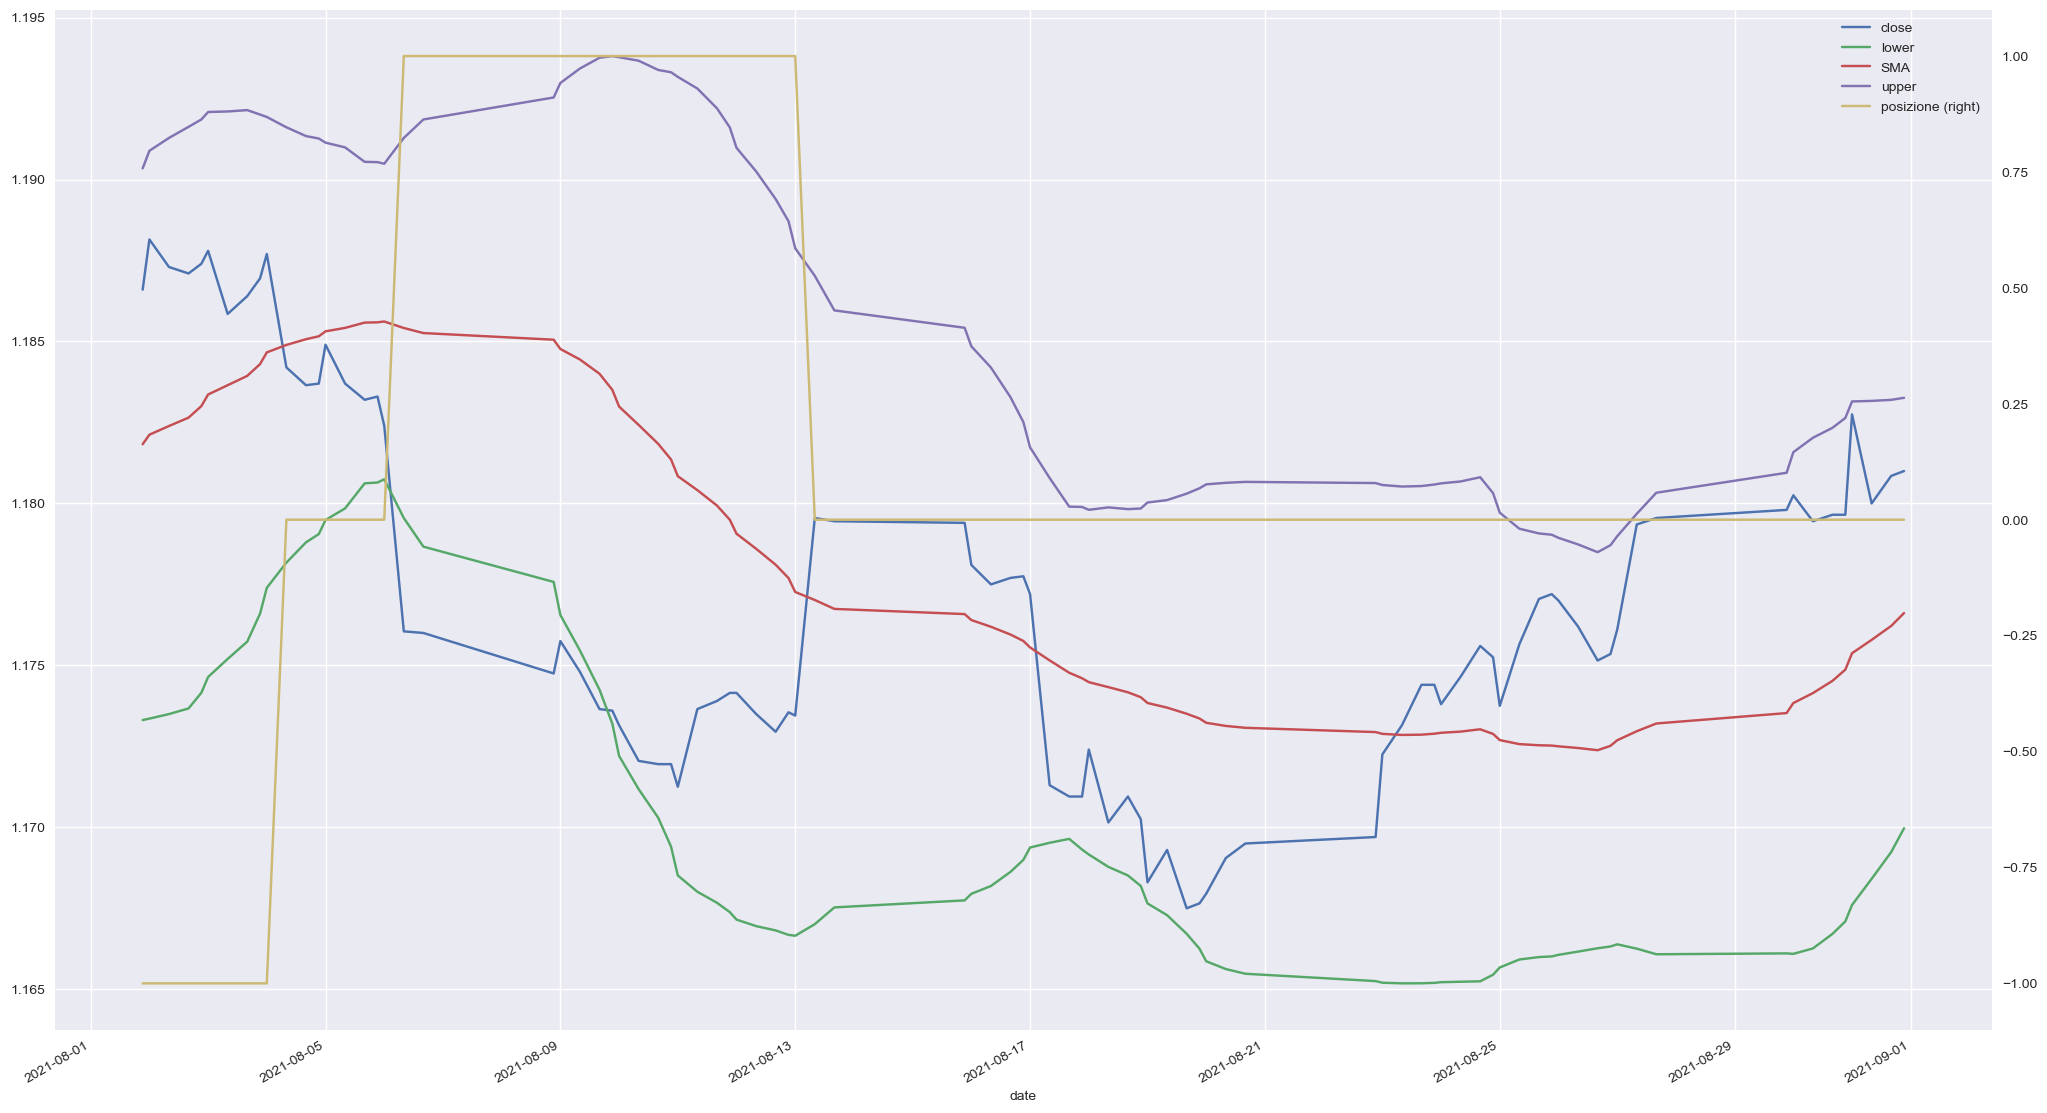

In [21]:
df[["close","lower","SMA","upper","posizione"]].loc["2021-08"].plot(figsize=(25,15),secondary_y="posizione")

<Axes: xlabel='date'>

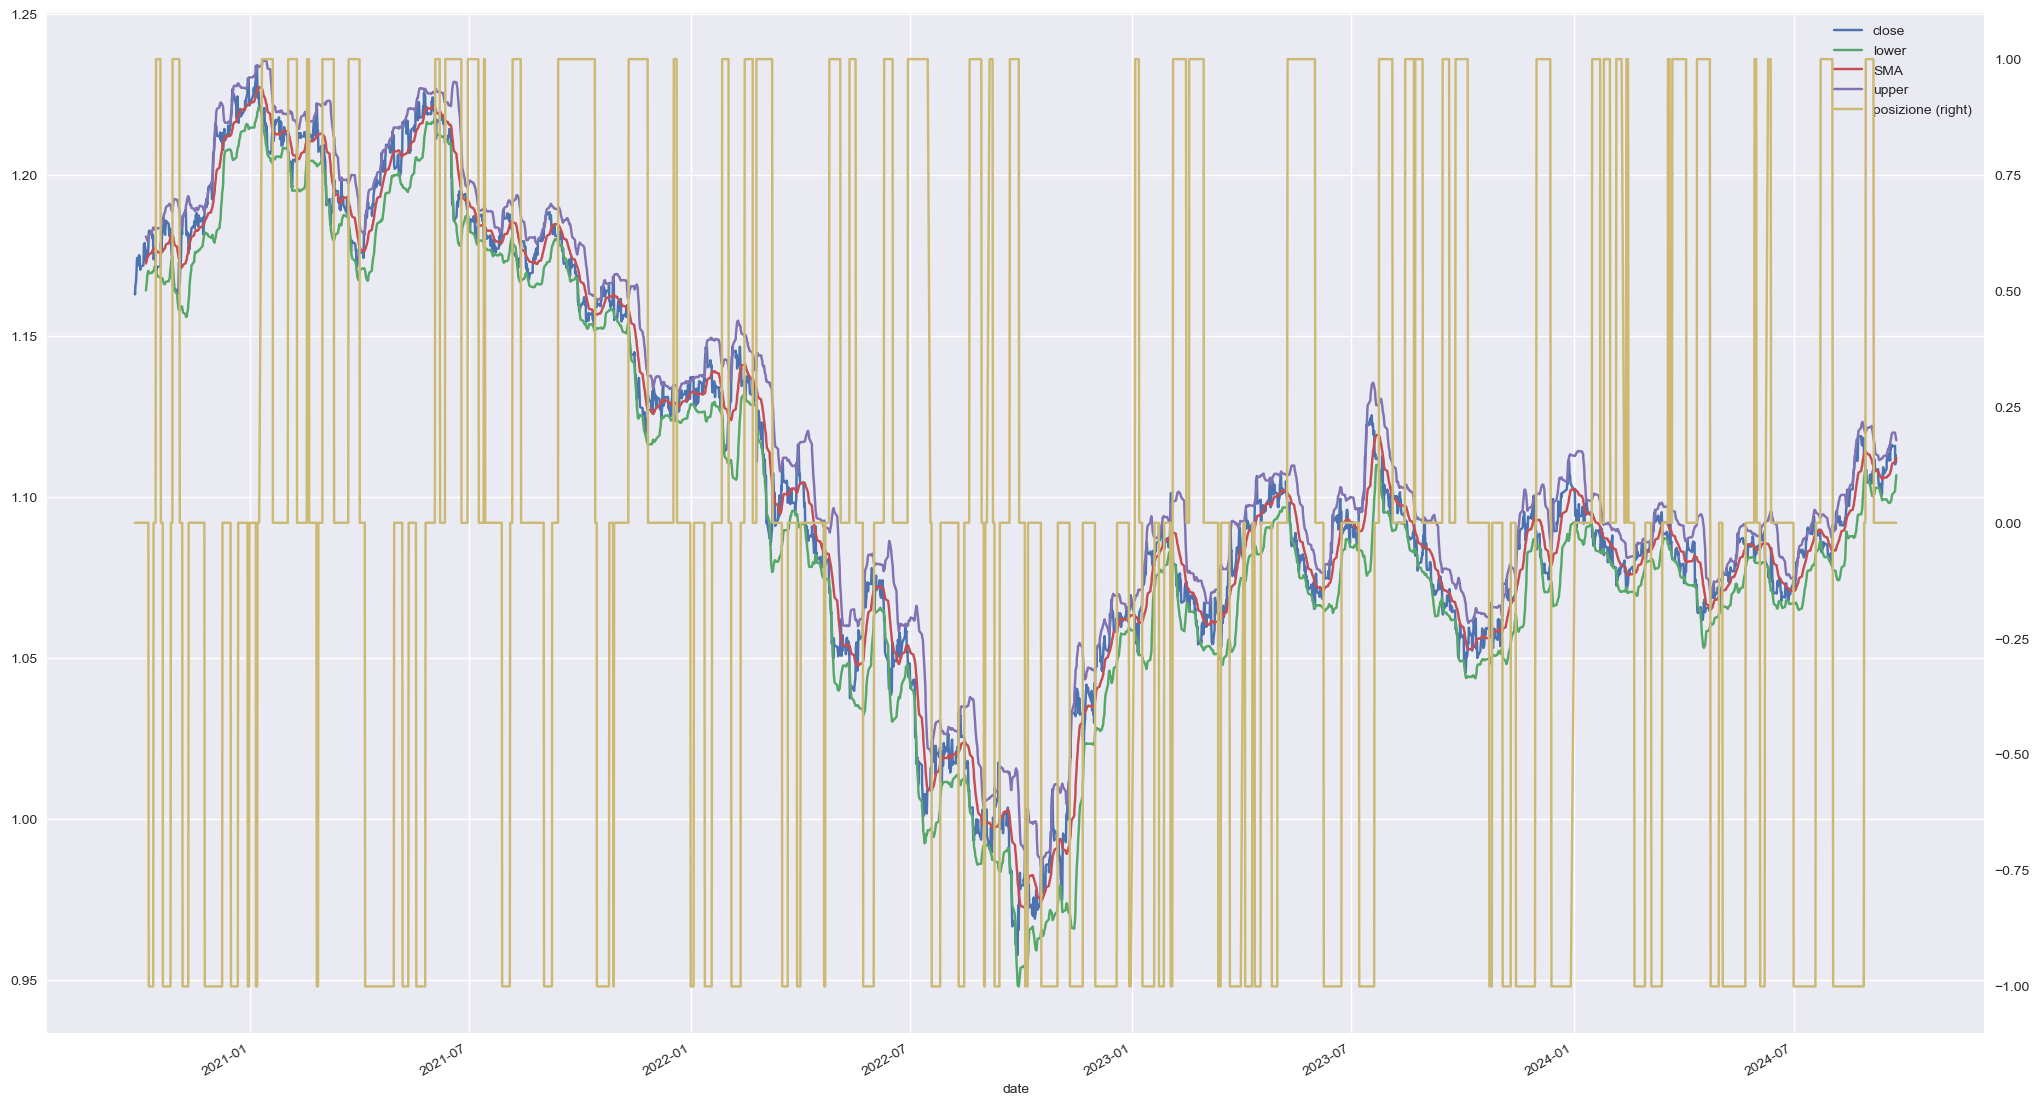

In [22]:
df[["close","lower","SMA","upper","posizione"]].plot(figsize=(25,15),secondary_y="posizione")

# Backtesting

In [23]:
df.columns

Index(['close', 'SMA', 'devst', 'lower', 'upper', 'posizione'], dtype='object')

In [24]:
df["logRet"]=np.log(df.close/df.close.shift(1))

In [25]:
df["strategia"]=df.posizione.shift(1)*df.logRet

In [26]:
df.strategia.sum()

0.07806602872463034

In [27]:
df.logRet.sum()

-0.04595123744918647

<Axes: xlabel='date'>

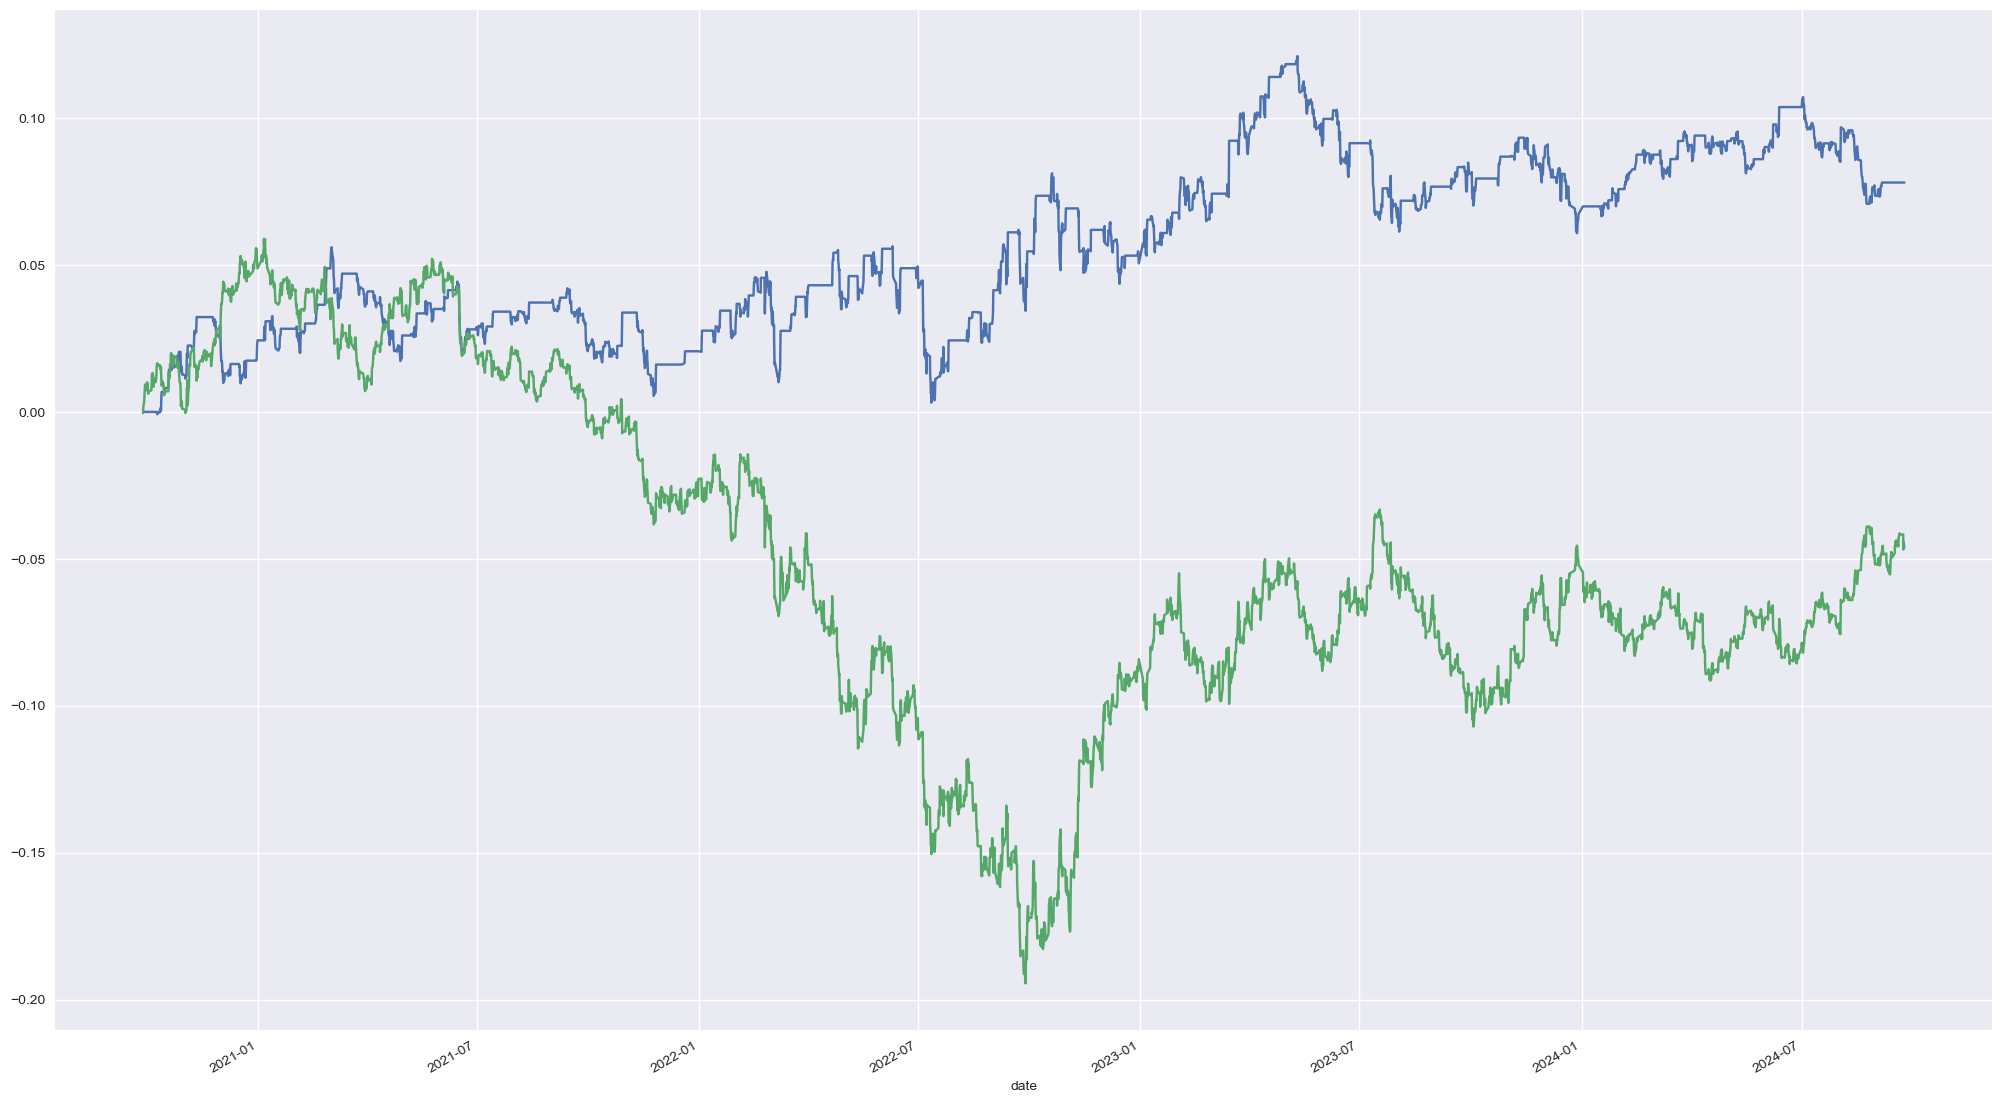

In [28]:
df.strategia.cumsum().plot(figsize=(25,15))
df.logRet.cumsum().plot()

In [29]:
comm=0.0
spread=0.00002/df.close.mean() 
# attenzione che 0.00011 è in dollari e df.close è in dollari. Ottimo. 
# Controllare sempre che i termini del rapporto usino la stessa unità di misura!

In [30]:
df["transazioni"]=abs(df.posizione.shift(1)-df.posizione.shift(2))
# attenzione che questa volta la transazione usa MEZZO SPREAD perché soltanto vendiamo o compriamo, 
# non vendiamo due volte o comprimao due volte, tranne nel caso in cui il valore sia 2 perché passo da -1 a +1

In [31]:
df.head(50)

close       SMA     devst     lower     upper  \
date                                                                         
2020-09-27 21:15:00+00:00  1.16340       NaN       NaN       NaN       NaN   
2020-09-28 00:00:00+00:00  1.16295       NaN       NaN       NaN       NaN   
2020-09-28 08:00:00+00:00  1.16600       NaN       NaN       NaN       NaN   
2020-09-28 16:00:00+00:00  1.16640       NaN       NaN       NaN       NaN   
2020-09-28 21:15:00+00:00  1.16770       NaN       NaN       NaN       NaN   
2020-09-29 00:00:00+00:00  1.16810       NaN       NaN       NaN       NaN   
2020-09-29 08:00:00+00:00  1.17165       NaN       NaN       NaN       NaN   
2020-09-29 16:00:00+00:00  1.17430       NaN       NaN       NaN       NaN   
2020-09-29 21:15:00+00:00  1.17415       NaN       NaN       NaN       NaN   
2020-09-30 00:00:00+00:00  1.17330       NaN       NaN       NaN       NaN   
2020-09-30 08:00:00+00:00  1.17220       NaN       NaN       NaN       NaN   
2020-09-30 16:00:00+00:00  1.17205       NaN       NaN       NaN       NaN   
2020-09-30 21:15:00+00:00  1.17235       NaN       NaN       NaN       NaN   
2020-10-01 00:00:00+00:00  1.17365       NaN       NaN       NaN       NaN   
2020-10-01 08:00:00+00:00  1.17515       NaN       NaN       NaN       NaN   
2020-10-01 16:00:00+00:00  1.17440       NaN       NaN       NaN       NaN   
2020-10-01 21:15:00+00:00  1.17440       NaN       NaN       NaN       NaN   
2020-10-02 00:00:00+00:00  1.17230       NaN       NaN       NaN       NaN   
2020-10-02 08:00:00+00:00  1.17060       NaN       NaN       NaN       NaN   
2020-10-02 16:00:00+00:00  1.17160       NaN       NaN       NaN       NaN   
2020-10-04 21:15:00+00:00  1.17195       NaN       NaN       NaN       NaN   
2020-10-05 00:00:00+00:00  1.17325       NaN       NaN       NaN       NaN   
2020-10-05 08:00:00+00:00  1.17845       NaN       NaN       NaN       NaN   
2020-10-05 16:00:00+00:00  1.17830       NaN       NaN       NaN       NaN   
2020-10-05 21:15:00+00:00  1.17890       NaN       NaN       NaN       NaN   
2020-10-06 00:00:00+00:00  1.17765       NaN       NaN       NaN       NaN   
2020-10-06 08:00:00+00:00  1.17780       NaN       NaN       NaN       NaN   
2020-10-06 16:00:00+00:00  1.17340       NaN       NaN       NaN       NaN   
2020-10-06 21:15:00+00:00  1.17370       NaN       NaN       NaN       NaN   
2020-10-07 00:00:00+00:00  1.17665  1.172557  0.004187  1.164183  1.180931   
2020-10-07 08:00:00+00:00  1.17665  1.172998  0.003875  1.165248  1.180748   
2020-10-07 16:00:00+00:00  1.17605  1.173435  0.003414  1.166606  1.180264   
2020-10-07 21:15:00+00:00  1.17655  1.173787  0.003156  1.167475  1.180098   
2020-10-08 00:00:00+00:00  1.17665  1.174128  0.002870  1.168388  1.179869   
2020-10-08 08:00:00+00:00  1.17520  1.174378  0.002606  1.169167  1.179589   
2020-10-08 16:00:00+00:00  1.17600  1.174642  0.002334  1.169973  1.179310   
2020-10-08 21:15:00+00:00  1.17670  1.174810  0.002293  1.170225  1.179395   
2020-10-09 00:00:00+00:00  1.17770  1.174923  0.002350  1.170223  1.179623   
2020-10-09 08:00:00+00:00  1.18185  1.175180  0.002662  1.169855  1.180505   
2020-10-09 16:00:00+00:00  1.18280  1.175497  0.002977  1.169542  1.181451   
2020-10-11 21:15:00+00:00  1.18155  1.175808  0.003107  1.169594  1.182022   
2020-10-12 00:00:00+00:00  1.18200  1.176140  0.003221  1.169698  1.182582   
2020-10-12 08:00:00+00:00  1.18040  1.176408  0.003230  1.169949  1.182867   
2020-10-12 16:00:00+00:00  1.18115  1.176658  0.003298  1.170062  1.183255   
2020-10-12 21:15:00+00:00  1.18130  1.176863  0.003391  1.170081  1.183645   
2020-10-13 00:00:00+00:00  1.17805  1.176985  0.003365  1.170255  1.183715   
2020-10-13 08:00:00+00:00  1.17385  1.176967  0.003381  1.170205  1.183729   
2020-10-13 16:00:00+00:00  1.17455  1.177042  0.003298  1.170446  1.183637   
2020-10-13 21:15:00+00:00  1.17420  1.177162  0.003116  1.170930  1.183393   
2020-10-14 00:00:00+00:00  1.17415  1.177247  0.002

In [32]:
df["strategiaNetto"]=df.strategia-df.transazioni*(spread/2+comm)

In [33]:
df.head(50)

close       SMA     devst     lower     upper  \
date                                                                         
2020-09-27 21:15:00+00:00  1.16340       NaN       NaN       NaN       NaN   
2020-09-28 00:00:00+00:00  1.16295       NaN       NaN       NaN       NaN   
2020-09-28 08:00:00+00:00  1.16600       NaN       NaN       NaN       NaN   
2020-09-28 16:00:00+00:00  1.16640       NaN       NaN       NaN       NaN   
2020-09-28 21:15:00+00:00  1.16770       NaN       NaN       NaN       NaN   
2020-09-29 00:00:00+00:00  1.16810       NaN       NaN       NaN       NaN   
2020-09-29 08:00:00+00:00  1.17165       NaN       NaN       NaN       NaN   
2020-09-29 16:00:00+00:00  1.17430       NaN       NaN       NaN       NaN   
2020-09-29 21:15:00+00:00  1.17415       NaN       NaN       NaN       NaN   
2020-09-30 00:00:00+00:00  1.17330       NaN       NaN       NaN       NaN   
2020-09-30 08:00:00+00:00  1.17220       NaN       NaN       NaN       NaN   
2020-09-30 16:00:00+00:00  1.17205       NaN       NaN       NaN       NaN   
2020-09-30 21:15:00+00:00  1.17235       NaN       NaN       NaN       NaN   
2020-10-01 00:00:00+00:00  1.17365       NaN       NaN       NaN       NaN   
2020-10-01 08:00:00+00:00  1.17515       NaN       NaN       NaN       NaN   
2020-10-01 16:00:00+00:00  1.17440       NaN       NaN       NaN       NaN   
2020-10-01 21:15:00+00:00  1.17440       NaN       NaN       NaN       NaN   
2020-10-02 00:00:00+00:00  1.17230       NaN       NaN       NaN       NaN   
2020-10-02 08:00:00+00:00  1.17060       NaN       NaN       NaN       NaN   
2020-10-02 16:00:00+00:00  1.17160       NaN       NaN       NaN       NaN   
2020-10-04 21:15:00+00:00  1.17195       NaN       NaN       NaN       NaN   
2020-10-05 00:00:00+00:00  1.17325       NaN       NaN       NaN       NaN   
2020-10-05 08:00:00+00:00  1.17845       NaN       NaN       NaN       NaN   
2020-10-05 16:00:00+00:00  1.17830       NaN       NaN       NaN       NaN   
2020-10-05 21:15:00+00:00  1.17890       NaN       NaN       NaN       NaN   
2020-10-06 00:00:00+00:00  1.17765       NaN       NaN       NaN       NaN   
2020-10-06 08:00:00+00:00  1.17780       NaN       NaN       NaN       NaN   
2020-10-06 16:00:00+00:00  1.17340       NaN       NaN       NaN       NaN   
2020-10-06 21:15:00+00:00  1.17370       NaN       NaN       NaN       NaN   
2020-10-07 00:00:00+00:00  1.17665  1.172557  0.004187  1.164183  1.180931   
2020-10-07 08:00:00+00:00  1.17665  1.172998  0.003875  1.165248  1.180748   
2020-10-07 16:00:00+00:00  1.17605  1.173435  0.003414  1.166606  1.180264   
2020-10-07 21:15:00+00:00  1.17655  1.173787  0.003156  1.167475  1.180098   
2020-10-08 00:00:00+00:00  1.17665  1.174128  0.002870  1.168388  1.179869   
2020-10-08 08:00:00+00:00  1.17520  1.174378  0.002606  1.169167  1.179589   
2020-10-08 16:00:00+00:00  1.17600  1.174642  0.002334  1.169973  1.179310   
2020-10-08 21:15:00+00:00  1.17670  1.174810  0.002293  1.170225  1.179395   
2020-10-09 00:00:00+00:00  1.17770  1.174923  0.002350  1.170223  1.179623   
2020-10-09 08:00:00+00:00  1.18185  1.175180  0.002662  1.169855  1.180505   
2020-10-09 16:00:00+00:00  1.18280  1.175497  0.002977  1.169542  1.181451   
2020-10-11 21:15:00+00:00  1.18155  1.175808  0.003107  1.169594  1.182022   
2020-10-12 00:00:00+00:00  1.18200  1.176140  0.003221  1.169698  1.182582   
2020-10-12 08:00:00+00:00  1.18040  1.176408  0.003230  1.169949  1.182867   
2020-10-12 16:00:00+00:00  1.18115  1.176658  0.003298  1.170062  1.183255   
2020-10-12 21:15:00+00:00  1.18130  1.176863  0.003391  1.170081  1.183645   
2020-10-13 00:00:00+00:00  1.17805  1.176985  0.003365  1.170255  1.183715   
2020-10-13 08:00:00+00:00  1.17385  1.176967  0.003381  1.170205  1.183729   
2020-10-13 16:00:00+00:00  1.17455  1.177042  0.003298  1.170446  1.183637   
2020-10-13 21:15:00+00:00  1.17420  1.177162  0.003116  1.170930  1.183393   
2020-10-14 00:00:00+00:00  1.17415  1.177247  0.002

<Axes: xlabel='date'>

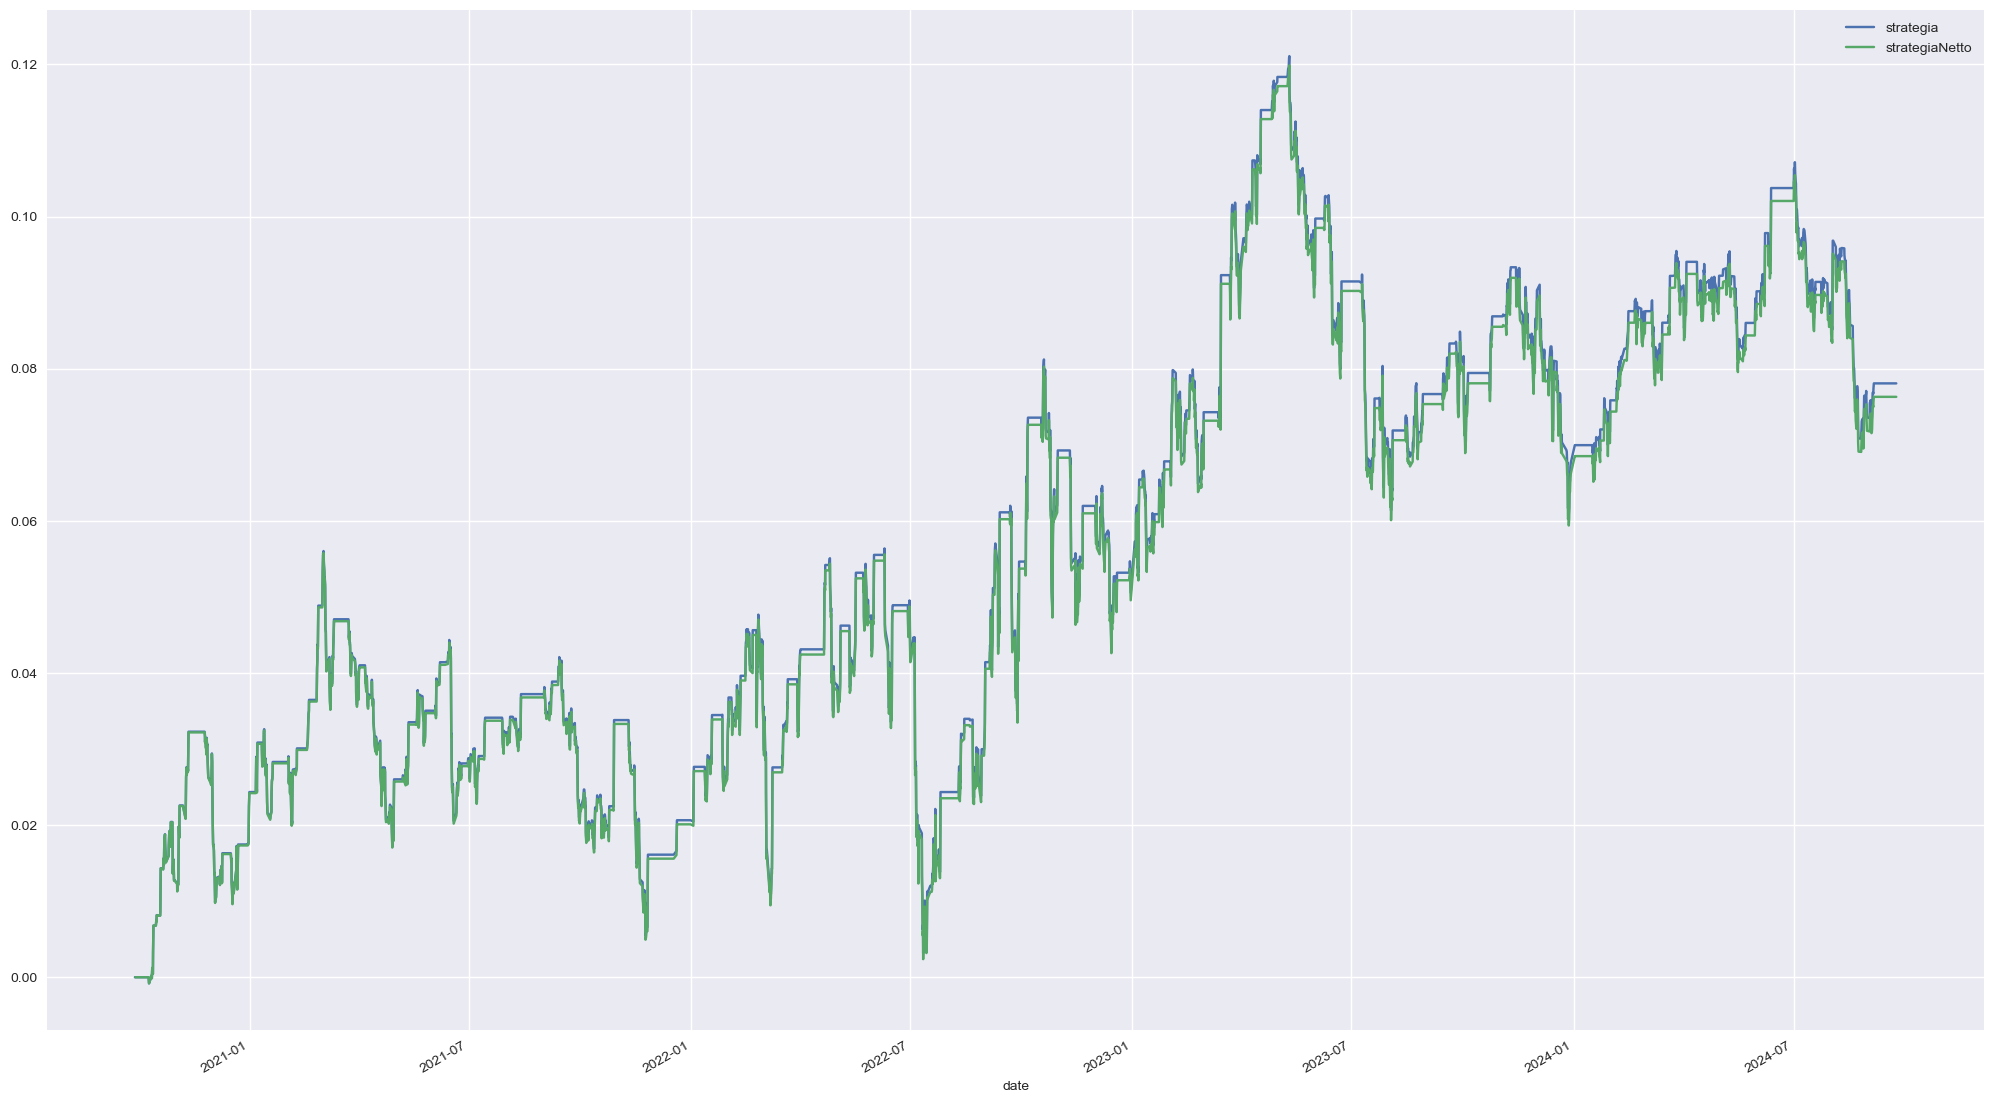

In [34]:
df[["strategia","strategiaNetto"]].cumsum().plot(figsize=(25,15))

In [35]:
df[["logRet","strategiaNetto"]].mean()*330

logRet           -0.003664
strategiaNetto    0.006085
dtype: float64

In [36]:
df[["logRet","strategiaNetto"]].std()*np.sqrt(330)

logRet            0.042158
strategiaNetto    0.031278
dtype: float64

In [37]:
(df[["logRet","strategiaNetto"]].cumsum().cummax()-df[["logRet","strategiaNetto"]].cumsum()).max()

logRet            0.253389
strategiaNetto    0.060485
dtype: float64

In [38]:
ib.disconnect()